<a href="https://colab.research.google.com/github/SoumyadeepB/Reinforcement-Learning/blob/master/Cart_Pole_REINFORCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
env = gym.make('CartPole-v1')

2

In [ ]:
''' For a  Neural Network Model:
def policy_model(env):
    n_states = env.observation_space.shape[0]
    n_actions = env.action_space.n 
    model = Sequential()
    model.add(Dense(8, input_dim=n_states, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(n_actions, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001))

    return model'''


def policy(env, state, theta):
    """ TODO: return probabilities for actions under softmax action selection """
    p = np.dot(state,theta).flatten()
    
    policy = 1.0 / (1.0 + np.exp(-p)) #Sigmoid Function
    #print("Sigmoid:",policy)
    total = np.sum(policy)
    policy = policy/total
    #print(policy)
    
    return policy  

In [ ]:
def discounted_rewards(rewards):
  gamma = 0.1
  G = np.zeros_like(rewards)
  future_rewards = 0
  for i in reversed(range(0,len(rewards))):
    future_rewards = gamma*future_rewards + rewards[i]
    G[i] = future_rewards    # G_t = R_(t+1) + γ * G_(t+1) 

  return G

In [ ]:
def gradient(state,theta):
  # Using Finite differences
  h = 0.001
  theta1 = theta + h
 
  f0 = np.log( np.dot(state, theta ) )
  f1 = np.log( np.dot(state, theta1) )
  #print("diff: ",f1-f0)

  grad = (f1 - f0)/h

  return grad

In [ ]:
def generate_episode(env, theta, display=False):
    """ Generates one episode and returns the list of states, the list of rewards and the list of actions of that episode """
    state = env.reset()
    states = [state]
    actions = []
    rewards = []
    for t in range(500):
        if display:
            env.render()
        p = policy(env, state, theta)
        #print("Policy: ",p)
        action = np.random.choice(len(p), p=p)

        state, reward, done, info = env.step(action)
        rewards.append(reward)
        actions.append(action)
        if done:
            break
        states.append(state)

    return states, rewards, actions




In [ ]:
def REINFORCE(env):
    theta = np.random.rand(4, 2)  # policy parameters
    alpha = 0.01
    low = abs(env.observation_space.low)

    for e in range(10000):
        if e % 300 == 0:
            states, rewards, actions = generate_episode(env, theta, False)  # display the policy every 300 episodes
        else:
            states, rewards, actions = generate_episode(env, theta, False)

        T = len(states)
        print("episode: " + str(e) + " length: " + str(T))

        v = discounted_rewards(rewards)
        
        # TODO: keep track of previous 100 episode lengths and compute mean

        # TODO: implement the reinforce algorithm to improve the policy weights
        for t in range(T):
          state = states[t] + low
          
          print(state)          
          #print("Vt: ",v[t])
          grad = gradient(state,theta)
          #print(grad)

          theta +=  alpha * grad * v[t]

In [ ]:
env = gym.make('CartPole-v1')
REINFORCE(env)
env.close()

In [ ]:
state= np.array([-0.03470816 ,-0.00487081 , 0.01776325 , 0.0267998 ])
theta = np.random.rand(4, 2)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


episode: 0 length: 20
episode: 1000 length: 12
episode: 2000 length: 18
episode: 3000 length: 17
episode: 4000 length: 15
episode: 5000 length: 17
episode: 6000 length: 18
episode: 7000 length: 26
episode: 8000 length: 13
episode: 9000 length: 16
Restarting...
episode: 0 length: 10
episode: 1000 length: 8
episode: 2000 length: 10
episode: 3000 length: 10
episode: 4000 length: 10
episode: 5000 length: 10
episode: 6000 length: 10
episode: 7000 length: 10
episode: 8000 length: 9
episode: 9000 length: 9
Restarting...
episode: 0 length: 8
episode: 1000 length: 10
episode: 2000 length: 9
episode: 3000 length: 10
episode: 4000 length: 9
episode: 5000 length: 10
episode: 6000 length: 10
episode: 7000 length: 10
episode: 8000 length: 9
episode: 9000 length: 10
Restarting...
episode: 0 length: 9
episode: 1000 length: 9
episode: 2000 length: 8
episode: 3000 length: 10
episode: 4000 length: 8
episode: 5000 length: 8
episode: 6000 length: 8
episode: 7000 length: 10
episode: 8000 length: 9
episode: 

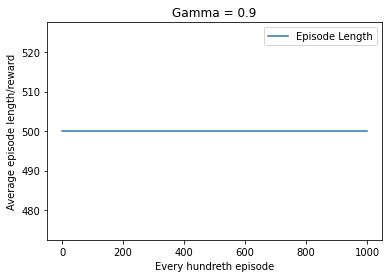

In [4]:
# -*- coding: utf-8 -*-
"""Cart_Pole_REINFORCE.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1SrLmy2AzHyBAW-vd8bkpJGAhtFwCrLjH
"""
import gym
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tqdm import tqdm

env = gym.make('CartPole-v1')
EPISODES = 100000
gamma = 0.1
theta = np.random.rand(4, 2)  # policy parameters
''' For a  Neural Network Model:
def policy_model(env):
    n_states = env.observation_space.shape[0]
    n_actions = env.action_space.n 
    model = Sequential()
    model.add(Dense(8, input_dim=n_states, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(n_actions, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001))
    return model'''

def policy(env, state, theta):
    """ TODO: return probabilities for actions under softmax action selection """
    h = np.matmul(state, theta).flatten() # Action preference function
    p = np.exp(h) 
    total = np.sum(p)
    policy = p/total
    return policy

def discounted_rewards(rewards):
    G = np.zeros_like(rewards)
    future_rewards = 0
    for i in reversed(range(0, len(rewards))):
        future_rewards = gamma*future_rewards + rewards[i]
        G[i] = future_rewards                # G_t = R_(t+1) + γ * G_(t+1)
    return G

def gradient(state, theta, action):
    delta = 0.001
    theta1 = np.copy(theta)
    theta1[:,action] += delta
    num = np.dot(state, theta[:,action])
    num = np.exp(num)
    den = np.exp(np.dot(state, theta[:, 0])) + np.exp(np.dot(state, theta[:, 1]))
    f0 = np.log(num/den)
    num = np.dot(state, theta1[:,action])
    num = np.exp(num)
    den = np.exp(np.dot(state, theta1[:, 0])) + np.exp(np.dot(state, theta1[:, 1]))
    f1 = np.log(num/den)
    gradient = (f1 - f0)/delta
    return gradient
# def gradient(state, theta):
#     h = np.matmul(state, theta)
#     p = np.exp(h)
#     prob = p / np.sum(p)
#     grad = state - (prob[0] * state + prob[1] * state)  # Check David Silver's slide PolicyGradient : Slide 17
    
#     return grad


def generate_episode(env, theta, display=False):
    """ Generates one episode and returns the list of states, the list of rewards and the list of actions of that episode """
    state = env.reset()
    states = [state]
    actions = []
    rewards = []
    for t in range(500):
        if display:
            env.render()
        p = policy(env, state, theta)
        #action = np.random.choice(len(p), p=p)
        action = np.argmax(p)
        state, reward, done, info = env.step(action)
        rewards.append(reward)
        actions.append(action)
        if done:
            break
        states.append(state)

    return states, rewards, actions


def REINFORCE(env):
    theta = np.random.rand(4, 2)  # policy parameters
    theta=theta
    alpha = 0.01
    episode_lengths = []
    length_per_hundred = []
    reward_sum = []
    reward_per_hundred = []
    e = 0

    while  e < EPISODES:
        if e % 100 == 0:
            length_per_hundred.append(np.mean(episode_lengths))
            reward_per_hundred.append(reward_sum)
            episode_lengths = []
            reward_sum = []
            states, rewards, actions = generate_episode(env, theta, False)  # display the policy every 300 episodes
        else:
            states, rewards, actions = generate_episode(env, theta, False)

        T = len(states)

        if e%1000==0:
          print("episode: " + str(e) + " length: " + str(T))

        v = discounted_rewards(rewards)

        # TODO: keep track of previous 100 episode lengths and compute mean
        episode_lengths.append(T)
        reward_sum.append(np.sum(rewards))

        # TODO: implement the reinforce algorithm to improve the policy weights
        for t in range(T-1):
            state = states[t]
            a = actions[t]
            grad = gradient(state, theta,a)            
            theta += alpha * (gamma ** t) * grad * v[t]

        e+=1
        if (episode_lengths[-1]<=495 and e>= 10000):            
          print("Restarting...")
          env.reset()
          e = 0
          theta = np.random.rand(4, 2)  # policy parameters
          episode_lengths = []
          length_per_hundred = []

    plt.plot(range(len(length_per_hundred)), length_per_hundred,label="Episode Length")    
    plt.xlabel("Every hundreth episode")
    plt.ylabel("Average episode length/reward")
    plt.title("Gamma = {}".format(gamma))
    plt.legend()
    plt.show()
    #plt.plot(range(len(reward_per_hundred)), reward_per_hundred, label="Reward")
    #plt.show()


env = gym.make('CartPole-v1')
gamma = 0.9
REINFORCE(env)
env.close()

# for i in range(1,10):
#   gamma = (i/10.0)
#   REINFORCE(env)
#   env.close()


In [ ]:
def gradient(state, theta, action):
    # Using Finite differences
    h = np.dot(state, theta)
    p = np.exp(h)
    prob = p / np.sum(p)
    grad = state - (prob[0] * state + prob[1] * state)  # Check David Silver's slide PolicyGradient : Slide 17

    return grad[action]


    def gradient(state, theta):
    # Using Finite differences
    h = 0.0001
    theta1 = theta + h
    f0 = np.log(np.exp(np.dot(state, theta)))
    f1 = np.log(np.exp(np.dot(state, theta1)))
    grad = (f1 - f0)/h

    return grad

In [19]:
np.ones((4,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])